# Autoencoderサンプル(Pytorch)
作成日2021/05/07


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
# from torchvision import datasets, transforms
import dataset
Dataset = dataset.dataset("Obrid_AE", "data")
Dataset.concat_data("sample_data")
Dataset = dataset.dataset("Obrid_AE", "test")
print("----------------------")
Dataset.concat_data("sample_test")
print("----------------------")
data = Dataset.read_savedata("sample_test")
print(data.shape[0])
print("----------------------")
data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 300, 300, 1)


(503, 256)
(503, 256)
----------------------
(99, 256)
(99, 256)
----------------------
(99, 256)
99
----------------------
(503, 256)
(99, 256)
1148 0
rate 0.9
data.shape[0]: 503
rate 452
TrainData (300, 300, 1, 1, 256)
TestData (51, 256)
ÄnomalyDta (99, 256)


##  一次元CNN
カーネルのサイズとか色々変えながらやってみてください。
前結合層も組み込もうとしてたけど、あまり具合が良くなさそうだったためコメントアウトしてます。
丸め誤差的なので出力サイズが256にならない現象が起きてるので、output_paddingなど追加した、ここら辺のパラメタを使えば埋め合わせができる

## 学習

In [8]:
import mainmodel
import numpy as np
model = mainmodel.Autoencoder2()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

outputs = []
#テンソル型に変換
data = torch.from_numpy(data.astype(np.float32)).clone()
for epoch in data:
    for data in epoch:
        recon = model(data)
        print(recon.shape, data.shape)
        loss = criterion(recon, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, data, recon))

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0087, 1.0052, 1.0087,  ..., 1.1272, 1.1289, 1.1237]]],


        [[[1.0035, 1.0052, 1.0070,  ..., 1.1376, 1.1359, 1.1307]]],


        [[[1.0087, 1.0052, 1.0087,  ..., 1.1115, 1.1115, 1.1080]]],


        ...,


        [[[1.0366, 1.0383, 1.0366,  ..., 1.2300, 1.2317, 1.2300]]],


        [[[1.0296, 1.0314, 

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0035, 1.0052, 1.0035,  ..., 1.1237, 1.1220, 1.1185]]],


        [[[1.0070, 1.0070, 1.0070,  ..., 1.0941, 1.0923, 1.0906]]],


        [[[1.0366, 1.0331, 1.0348,  ..

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0453, 1.0436, 1.0453,  ..., 1.0714, 1.0679, 1.0697]]],


        [[[1.0087, 1.0070, 1.0087,  ..., 1.1341, 1.1359, 1.1307]]],


        [[[1.0070, 1.0070, 1.0070,  ..., 1.1533, 1.1498, 1.1463]]],


        ...,


        [[[1.0035, 1.0035, 1.0035,  ..., 1.0279, 1.0296, 1.0296]]],


        [[[1.0174, 1.0122, 1.0122,  ..., 1.2125, 1.2108, 1.2091]]],


        [[[1.0540, 1.0557, 1.0557,  ..., 1.1324, 1.1289, 1.1289]]]]), Loss:0.0011
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0000, 1.0000, 1.0035,  ..., 1.0854, 1.0836, 1.0784]]],


        [[[1.0017, 1.0017, 1.0000,  ..., 1.0889, 1.0854, 1.0854]]],


        [[[1.0401, 1.0348, 1.0348,  ..., 1.2561, 1.2596, 1.2578]]],


        ...,


        [[[1.0017, 1.0035, 1.0017,  ..., 1.0679, 1.0697, 1.0627]]],


        [[[1.0331, 1.0314, 1.0348,  ..., 1.0662, 1.0679, 1.0610]]],


        [[[1.0035, 1.0052, 1.0070,  ..., 1.1115, 1.1115, 1.1098]]]]), Loss:0.0022
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0261, 1.0226, 1.0209,  ..., 1.1725, 1.1760, 1.1742]]],


        [[[1.0052, 1.0017, 1.0000,  ..., 1.1882, 1.1882, 1.1847]]],


        [[[1.0035, 1.0035, 1.0017,  ..., 1.1411, 1.1394, 1.1429]]],


        ...,


        [[[1.0052, 1.0017, 1.0000,  ..., 1.1725, 1.1690, 1.1672]]],


        [[[1.0523, 1.0523, 1.0540,  ..., 1.1080, 1.1098, 1.1045]]],


        [[[1.0070, 1.0052, 1.0052,  ..., 1.1220, 1.1202, 1.1202]]]]), Loss:0.0012
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0157, 1.0174, 1.0157,  ..., 1.1672, 1.1638, 1.1620]]],


        [[[1.0261, 1.0244, 1.0279,  ..., 1.1725, 1.1672, 1.1725]]],


        [[[1.0052, 1.0052, 1.0052,  ..., 1.0906, 1.0923, 1.0854]]],


        ...,


        [[[1.0557, 1.0592, 1.0610,  ..., 1.1916, 

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0035, 1.0052, 1.0070,  ..., 1.1254, 1.1237, 1.1220]]],


        [[[1.0105, 1.0139, 1.0122,  ..., 1.0697, 1.0714, 1.0714]]],


        [[[1.0087, 1.0052, 1.0087,  ..., 1.1254, 1.1254, 1.1167]]],


        ...,


        [[[1.0052, 1.0017, 1.0017,  ..., 1.1080, 1.1063, 1.1063]]],


        [[[1.1115, 1.1098, 1.1115,  ..., 1.3693, 1.3693, 1.3676]]],


        [[[1.0383, 1.0383, 1.0383,  ..., 1.2544, 1.25

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0070, 1.0052, 1.0070,  ..., 1.0819, 1.0836, 1.0819]]],


        [[[1.0557, 1.0557, 1.0592,  ..., 1.2108, 1.2125, 1.1986]]],


        [[[1.0000, 1.0017, 1.0017,  ..., 1.1289, 1.1272, 1.1254]]],


        ...,


        [[[1.0401, 1.0348, 1.0348,  ..., 1.3084, 1.3101, 1.2979]]],


        [[[1.0139, 1.0139, 1.0139,  ..., 1.1516, 1.1516, 1.1411]]],


        [[[1.0017, 1.0035, 1.0035,  ..., 1.0732, 1.0714, 1.0732]]]]), Loss:0.0031
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0122, 1.0087, 1.0105,  ..., 1.0401, 1.0383, 1.0366]]],


        [[[1.0261, 1.0244, 1.0279,  ..., 1.2108, 1.2108, 1.2056]]],


        [[[1.0017, 1.0035, 1.0017,  ..., 1.0679, 1.0697, 1.0627]]],


        ...,


        [[[1.1951, 1.1951, 1.1969,  ..., 1.4321, 1.4303, 1.4286]]],


        [[[1.0035, 1.0000, 1.0017,  ..., 1.0941, 1.0941, 1.0871]]],


        [[[1.0052, 1.0105, 1.0105,  ..., 1.0732, 1.0732, 1.0732]]]]), Loss:0.0032
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0017, 1.0052, 1.0070,  ..., 1.1167, 1.1150, 1.1150]]],


        [[[1.0017, 1.0035, 1.0035,  ..., 1.0662, 1.0627, 1.0645]]],


        [[[1.0331, 1.0331, 1.0331,  ..., 1.1307, 1.1307, 1.1341]]],


        ...,


        [[[1.0000, 1.0000, 1.0000,  ..., 1.0836, 1.0836, 1.0749]]],


        [[[1.0557, 1.0592, 1.0610,  ..., 1.1916, 1.1899, 1.1864]]],


        [[[1.0052, 1.0035, 1.0035,  ..., 1.0801, 1.0784, 1.0784]]]]), Loss:0.0016
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0070, 1.0070, 1.0070,

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0035, 1.0070, 1.0087,  ..., 1.1376, 1.1394, 1.1324]]],


        [[[1.0000, 1.0000, 1.0017,  ..., 1.0645, 1.0610, 1.0575]]],


        [[[1.0070, 1.0052, 1.0052,  ..

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0052, 1.0052, 1.0035,  ..., 1.0662, 1.0627, 1.0645]]],


        [[[1.0261, 1.0226, 1.0209,  ..., 1.1725, 1.1760, 1.1742]]],


        [[[1.0087, 1.0052, 1.0070,  ..., 1.1394, 1.1376, 1.1359]]],


        ...,


        [[[1.0035, 1.0052, 1.0070,  ..., 1.1324, 1.1289, 1.1237]]],


        [[[1.0331, 1.0296, 1.0314,  ..., 1.2334, 1.2334, 1.2160]]],


        [[[1.0470, 1.0436, 1.0436,  ..., 1.1760, 1.1794, 1.1794]]]]), Loss:0.0016
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0070, 1.0035, 1.0052,  ..., 1.1167, 1.1167, 1.1080]]],


        [[[1.0000, 1.0000, 1.0017,  ..., 1.0836, 1.0836, 1.0767]]],


        [[[1.0401, 1.0366, 1.0401,  ..., 1.0592, 1.0557, 1.0592]]],


        ...,


        [[[1.0052, 1.0105, 1.0105,  ..., 1.0366, 1.0366, 1.0348]]],


        [[[1.0052, 1.0052, 1.0035,  ..., 1.0662, 1.0627, 1.0645]]],


        [[[1.0000, 1.0017, 1.0017,  ..., 1.0645, 1.06

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0017, 1.0017, 1.0035,  ..., 1.0470, 1.0453, 1.0453]]],


        [[[1.0017, 1.0017, 1.0035,  ..., 1.0645, 1.0575, 1.0627]]],


        [[[1.0052, 1.0052, 1.0035,  ..., 1.0662, 1.0627, 1.0645]]],


        ...,


        [[[1.0017, 1.0017, 1.0035,  ..., 1.0470, 1.0453, 1.0453]]],


        [[[1.0662, 1.0679, 1.0697,  ..., 1.2125, 1.2143, 1.2091]]],


        [[[1.0070, 1.0052, 1.0070,  ..., 1.1063, 1.1045, 1.0976]]]]), Loss:0.0012
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.2300, 1.2334, 1.2317,

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.2300, 1.2334, 1.2317,  ..., 1.4286, 1.4286, 1.4181]]],


        [[[1.0000, 1.0017, 1.0052,  ..., 1.0836, 1.0836, 1.0819]]],


        [[[1.0749, 1.0749, 1.0767,  ..., 1.3484, 1.3484, 1.3502]]],


        ...,


        [[[1.0035, 1.0000, 1.0017,  ..., 1.0732, 1.0732, 1.0662]]],


        [[[1.0505, 1.0488, 1.0505,  ..., 1.3031, 1.3014, 1.3031]]],


        [[[1.0174, 1.0157, 1.0139,  ..., 1.2230, 1.2213, 1.2195]]]]), Loss:0.0011
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0436, 1.0453, 1.0453,  ..., 1.0470, 1.0453, 1.0505]]],


        [[[1.0052, 1.0087, 1.0122,  ..., 1.1254, 1.1254, 1.1220]]],


        [[[1.0052, 1.0035, 1.0052,  ..., 1.1098, 1.1115, 1.1045]]],


        ...,


        [[[1.0017, 1.0035, 1.0000,  ..., 1.0575, 1.0575, 1.0523]]],


        [[[1.0035, 1.0052, 1.0070,  ..., 1.1220, 1.1202, 1.1150]]],


        [[[1.0784, 1.0784, 1.0801,  ..., 1.2108, 1.2108, 1.2125]]]]), Loss:0.0052
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0017, 1.0017, 1.0000,  ..., 1.0732, 1.0732, 1.0749]]],


        [[[1.0157, 1.0174, 1.0157,  ..., 1.1080, 1.1098, 1.1080]]],


        [[[1.0052, 1.0105, 1.0105,  ..., 1.0854, 1.0801, 1.0801]]],


        ...,


        [[[1.1220, 1.1220, 1.1237,  ..., 1.3362, 1.3415, 1.3345]]],


        [[[1.0017, 1.0017, 1.0000,  ..., 1.0923, 1.0906, 1.0889]]],


        [[[1.0070, 1.0087, 1.0105,  ..., 1.0801, 1.07

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.0366, 1.0348, 1.0366,  ..., 1.1707, 1.1690, 1.1655]]],


        [[[1.0070, 1.0105, 1.0105,  ..., 1.1324, 1.1307, 1.1307]]],


        [[[1.0017, 1.0000, 1.0035,  ..., 1.0889, 1.0889, 1.0801]]],


        ...,


        [[[1.0017, 1.0052, 1.0035,  ..., 1.0557, 1.0523, 1.0523]]],


        [[[1.0017, 1.0035, 

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
Epoch:tensor([[[[1.1951, 1.1951, 1.1969,  ..., 1.4321, 1.4303, 1.4286]]],


        [[[1.0052, 1.0035, 1.0052,  ..., 1.1080, 1.1080, 1.1010]]],


        [[[1.0017, 1.0052, 1.0017,  ..., 1.1115, 1.1080, 1.1045]]],


        ...,


        [[[1.0209, 1.0192, 1.0192,  ..., 1.0470, 1.0488, 1.0505]]],


        [[[1.0070, 1.0052, 1.0052,  ..., 1.0488, 1.0470, 1.0488]]],


        [[[1.0105, 1.0105, 1.0105,  ..., 1.1307, 1.1272, 1.1237]]]]), Loss:0.0013
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 2

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1

## 学習過程

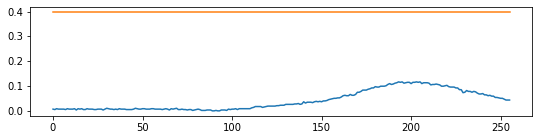

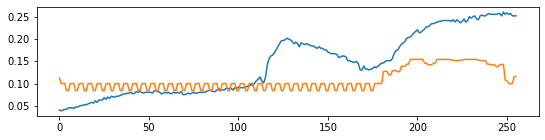

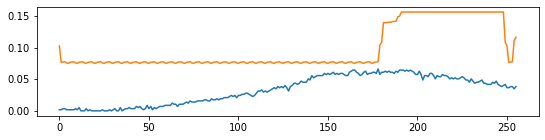

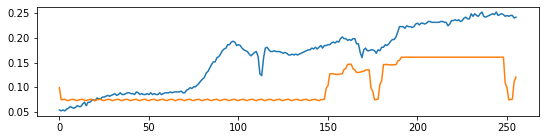

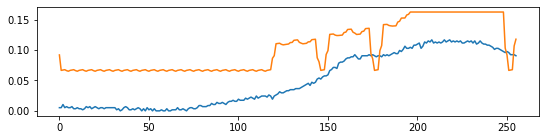

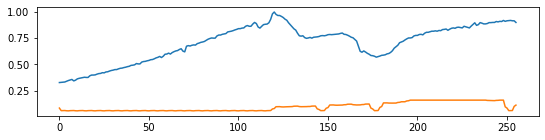

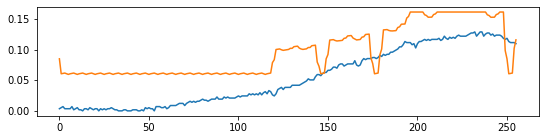

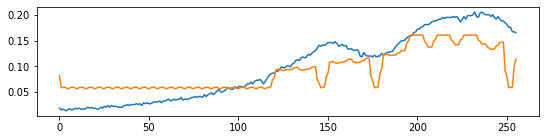

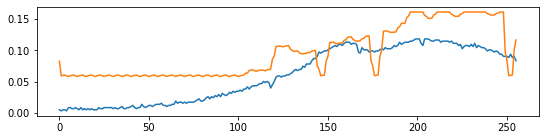

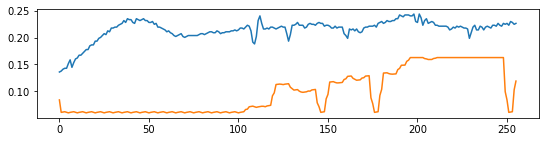

In [10]:
import numpy as np
model_name = "5"
ModelEdit = mainmodel.Modeledit("Obrid_AE")
ModelEdit.save_model(model, model_name) 
epoch_num = 100
for k in range(0, epoch_num, int(epoch_num/10)):
    plt.figure(figsize=(9, 2))
    datas = outputs[k][1].flatten().detach().numpy()
    recon = outputs[k][2].flatten().detach().numpy()
    # print(data.flatten())
    # print(recon.flatten())
    plt.plot(datas)
    plt.plot(recon)

## 異常検知

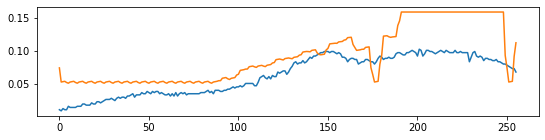

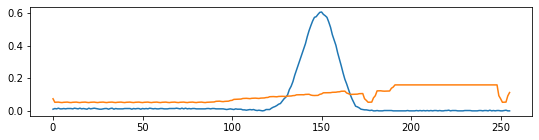

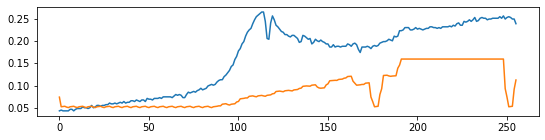

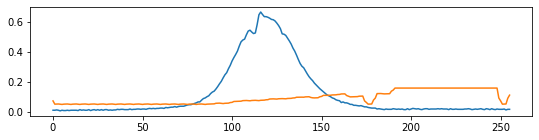

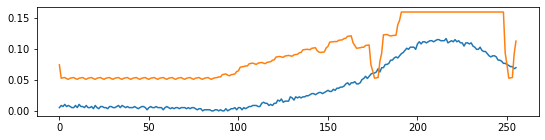

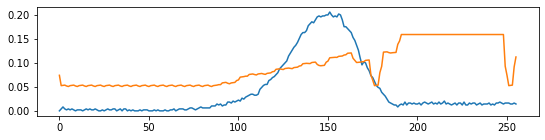

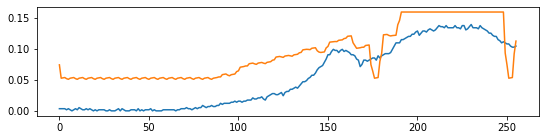

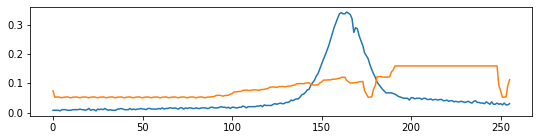

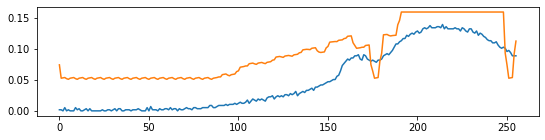

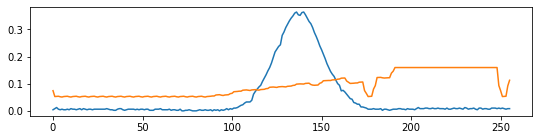

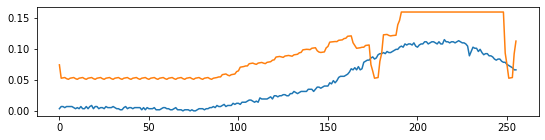

IndexError: index 60 is out of bounds for axis 0 with size 51

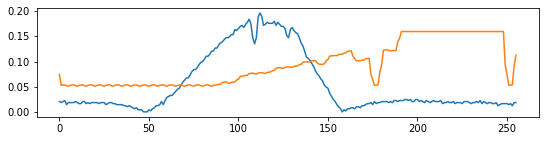

In [11]:
num = 5
for i in range(anomaly_data.shape[0]):
    if i % 10 == 0:
        data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
        test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()

        plt.figure(figsize=(9, 2))
        # data = data0.numpy()
        data = data0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(data0.numpy())
        plt.plot(recon.flatten())
        plt.show()

        plt.figure(figsize=(9, 2))
        # data = test0.numpy()
        data = test0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(test0.numpy())
        plt.plot(recon.flatten())

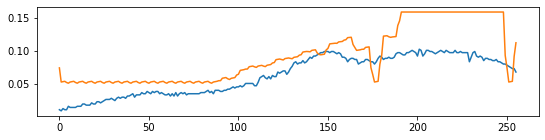

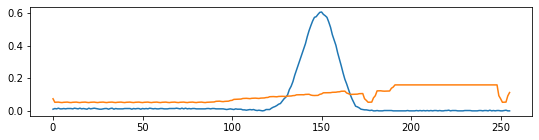

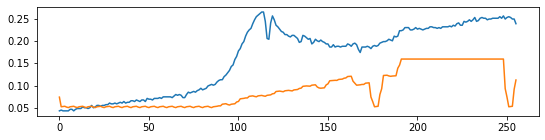

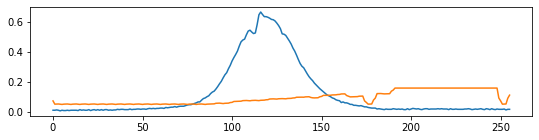

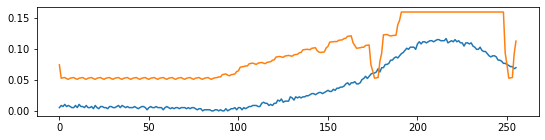

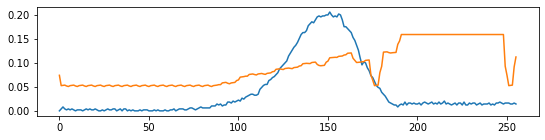

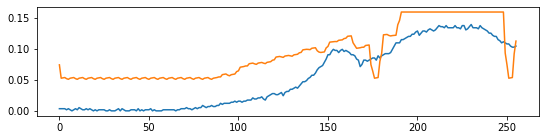

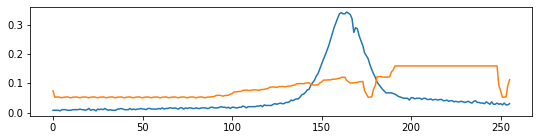

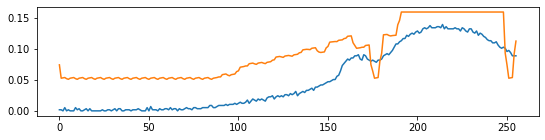

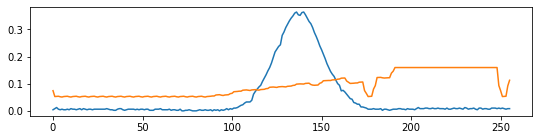

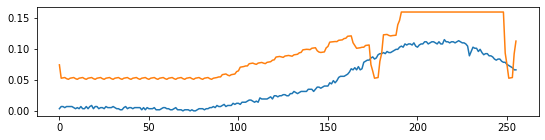

IndexError: index 60 is out of bounds for axis 0 with size 51

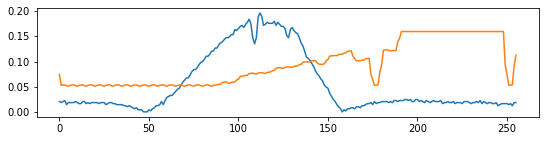

In [15]:
num = 2
input_model = mainmodel.Autoencoder2()
Dataset.savenumpy(data, test_data, anomaly_data, num)

new_model = mainmodel.Modeledit("Obrid_AE").read_model(input_model,"Obrid_AE/model_data/20210515/2.pth")
for i in range(anomaly_data.shape[0]):
    if i % 10 == 0:
        data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
        test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()

        plt.figure(figsize=(9, 2))
        # data = data0.numpy()
        data = data0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(data0.numpy())
        plt.plot(recon.flatten())
        plt.show()

        plt.figure(figsize=(9, 2))
        # data = test0.numpy()
        data = test0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(test0.numpy())
        plt.plot(recon.flatten())